<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/kfold%20xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [2]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [4]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [5]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [6]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [7]:
def tp(y_true, y_pred):
  specificite= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
  return specificite
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred):
  MCC= matthews_corrcoef(y_true, y_pred) 
  return MCC
my_scorer1 = make_scorer(tp1, greater_is_better=True)
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer2 = make_scorer(tp2, greater_is_better=True)    

In [8]:
 from sklearn.feature_selection import SelectFromModel,RFECV
 from sklearn.model_selection import StratifiedKFold
 from sklearn.neural_network import MLPClassifier

# K_fold =11

In [13]:
rfecv1= RFECV(XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),cv=StratifiedKFold(11))
rfecv1.fit(X,Y)
# check the support
rfecv1.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [14]:
# name wise features and count
feature_selected1 =  X.columns[rfecv1.get_support()]
feature_selected1

Index(['Min_IRM', 'Amp3_TempJ', 'Min_TempJ', 'Max_TempN', 'Moy_EVI', 'Var_EVI',
       'IPT_Moy', 'Prec_Juill', 'Tmax_Avril', 'Vent_Juin'],
      dtype='object')

In [15]:
 x_rfe1=X[feature_selected1]

In [16]:
 x_rfe1

,Min_IRM,Amp3_TempJ,Min_TempJ,Max_TempN,Moy_EVI,Var_EVI,IPT_Moy,Prec_Juill,Tmax_Avril,Vent_Juin
0,2690,7,14721,14561,2906,1,0.375000,1,22.600000,7.1
1,3350,31,14941,14705,2596,0,-0.281250,0,24.600000,6.4
2,3350,31,14941,14705,2596,0,-0.281250,0,24.600000,6.4
3,2930,23,14854,14690,2578,0,0.898438,0,24.600000,6.2
4,2350,33,14918,14719,2190,35,-3.468750,0,24.700001,5.7
...,...,...,...,...,...,...,...,...,...,...
249,880,5,14387,14675,5253,47,2.828125,1,18.900000,3.9
250,1400,1,14350,14743,3460,7,1.265625,1,18.700001,3.7
251,1080,6,14385,14666,5078,70,2.179688,1,18.900000,4.0
252,620,0,0,0,3571,40,1.406250,1,19.799999,4.1


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

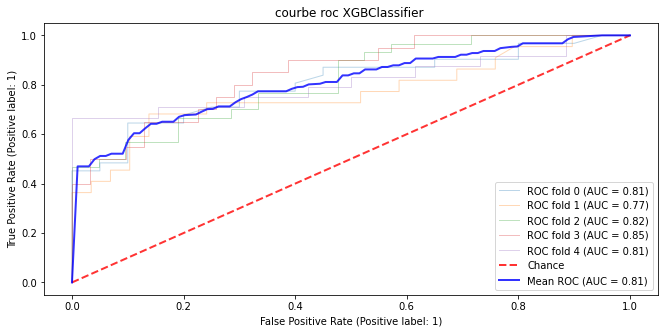

Accuracy: [0.7254902  0.60784314 0.68627451 0.74509804 0.7       ]
moy_accuracy: 0.69
precision: [0.79310345 0.53125    0.76923077 0.62962963 0.68      ]
moy_precision: 0.68
sensibilité : [0.74193548 0.77272727 0.66666667 0.85       0.70833333]
moy_sensibilité: 0.75
spécificité : [0.7        0.48275862 0.71428571 0.67741935 0.69230769]
moy_spécificité: 0.65
MCC : [0.43565668 0.26171311 0.37504578 0.51589867 0.40032038]
MCC: 0.40
balanced_accuracy : [0.72096774 0.62774295 0.69047619 0.76370968 0.70032051]
balanced_accuracy: 0.70
roc_auc : [0.80564516 0.76567398 0.81746032 0.84677419 0.8125    ]
roc_auc: 0.81
cohen_kappa_scorec : [0.43423138 0.24219911 0.37037037 0.49658314 0.4       ]
cohen_kappa_scorec: 0.39
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Fun

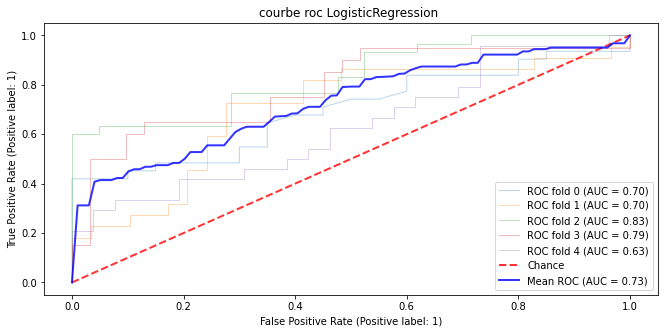

Accuracy: [0.56862745 0.66666667 0.74509804 0.7254902  0.56      ]
moy_accuracy: 0.65
precision: [0.71428571 0.5862069  0.79310345 0.65       0.54545455]
moy_precision: 0.66
sensibilité : [0.48387097 0.77272727 0.76666667 0.65       0.5       ]
moy_sensibilité: 0.63
spécificité : [0.7        0.5862069  0.71428571 0.77419355 0.61538462]
moy_spécificité: 0.68
MCC : [0.18240584 0.35893417 0.47792749 0.42419355 0.11613145]
MCC: 0.31
balanced_accuracy : [0.59193548 0.67946708 0.74047619 0.71209677 0.55769231]
balanced_accuracy: 0.66
roc_auc : [0.69596774 0.70062696 0.83174603 0.79193548 0.62980769]
roc_auc: 0.73
cohen_kappa_scorec : [0.16888889 0.34566038 0.47754137 0.42419355 0.11575563]
cohen_kappa_scorec: 0.31
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

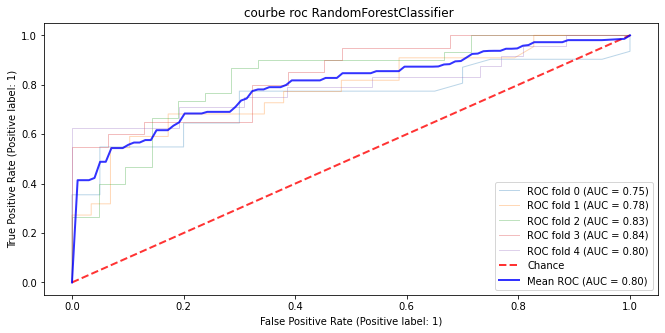

Accuracy: [0.68627451 0.66666667 0.68627451 0.70588235 0.76      ]
moy_accuracy: 0.70
precision: [0.94117647 0.5862069  0.85       0.61904762 0.77272727]
moy_precision: 0.75
sensibilité : [0.51612903 0.77272727 0.56666667 0.65       0.70833333]
moy_sensibilité: 0.64
spécificité : [0.95       0.5862069  0.85714286 0.74193548 0.80769231]
moy_spécificité: 0.79
MCC : [0.48276756 0.35893417 0.42721367 0.38881244 0.51936565]
MCC: 0.44
balanced_accuracy : [0.73306452 0.67946708 0.71190476 0.69596774 0.75801282]
balanced_accuracy: 0.72
roc_auc : [0.74596774 0.77978056 0.82857143 0.84193548 0.79967949]
roc_auc: 0.80
cohen_kappa_scorec : [0.41463415 0.34566038 0.39555556 0.38848921 0.51768489]
cohen_kappa_scorec: 0.41
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

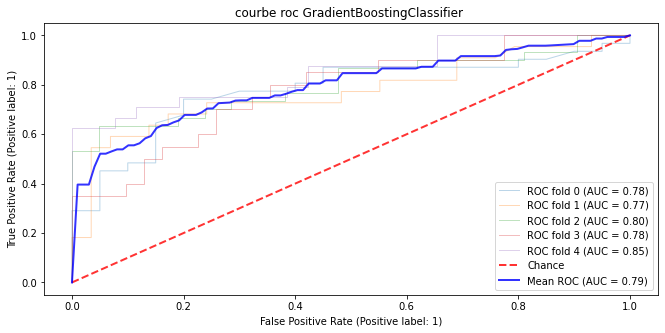

Accuracy: [0.68627451 0.66666667 0.74509804 0.70588235 0.78      ]
moy_accuracy: 0.72
precision: [0.85714286 0.59259259 0.9047619  0.60869565 0.80952381]
moy_precision: 0.75
sensibilité : [0.58064516 0.72727273 0.63333333 0.7        0.70833333]
moy_sensibilité: 0.67
spécificité : [0.85       0.62068966 0.9047619  0.70967742 0.84615385]
moy_spécificité: 0.79
MCC : [0.42721367 0.34526705 0.53809524 0.4019712  0.5612743 ]
MCC: 0.45
balanced_accuracy : [0.71532258 0.67398119 0.76904762 0.70483871 0.77724359]
balanced_accuracy: 0.73
roc_auc : [0.77822581 0.77194357 0.8031746  0.77741935 0.85096154]
roc_auc: 0.80
cohen_kappa_scorec : [0.39555556 0.33867277 0.50559284 0.39905734 0.55716586]
cohen_kappa_scorec: 0.44
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

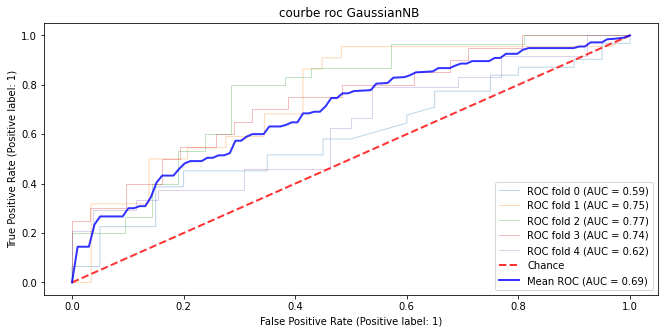

Accuracy: [0.56862745 0.43137255 0.70588235 0.56862745 0.62      ]
moy_accuracy: 0.58
precision: [0.63636364 0.42857143 0.7027027  0.47058824 0.57575758]
moy_precision: 0.56
sensibilité : [0.67741935 0.95454545 0.86666667 0.8        0.79166667]
moy_sensibilité: 0.82
spécificité : [0.4        0.03448276 0.47619048 0.41935484 0.46153846]
moy_spécificité: 0.36
MCC : [ 0.07909557 -0.02799463  0.37811038  0.22718473  0.26704433]
MCC: 0.18
balanced_accuracy : [0.53870968 0.49451411 0.67142857 0.60967742 0.62660256]
balanced_accuracy: 0.59
roc_auc : [0.58951613 0.7484326  0.76507937 0.73548387 0.625     ]
roc_auc: 0.69
cohen_kappa_scorec : [ 0.07881773 -0.00955631  0.36090226  0.19512195  0.24960506]
cohen_kappa_scorec: 0.17
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

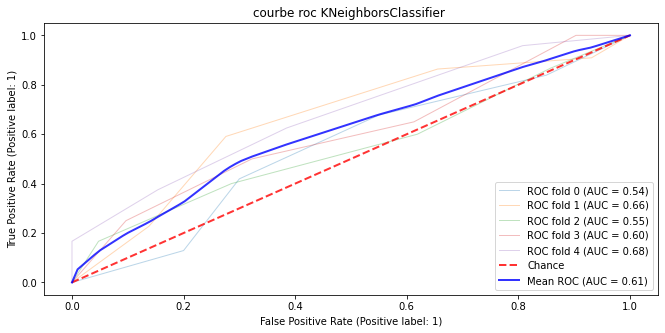

Accuracy: [0.52941176 0.66666667 0.52941176 0.60784314 0.62      ]
moy_accuracy: 0.59
precision: [0.68421053 0.61904762 0.66666667 0.5        0.69230769]
moy_precision: 0.63
sensibilité : [0.41935484 0.59090909 0.4        0.5        0.375     ]
moy_sensibilité: 0.46
spécificité : [0.7        0.72413793 0.71428571 0.67741935 0.84615385]
moy_spécificité: 0.73
MCC : [0.12052693 0.31704101 0.11769798 0.17741935 0.25189193]
MCC: 0.20
balanced_accuracy : [0.55967742 0.65752351 0.55714286 0.58870968 0.61057692]
balanced_accuracy: 0.59
roc_auc : [0.54274194 0.65830721 0.54603175 0.6        0.68028846]
roc_auc: 0.61
cohen_kappa_scorec : [0.10787172 0.31678487 0.10526316 0.17741935 0.22512235]
cohen_kappa_scorec: 0.19
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

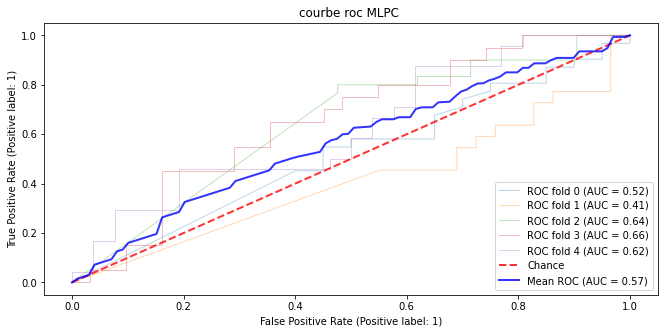

Accuracy: [0.60784314 0.49019608 0.37254902 0.60784314 0.52      ]
moy_accuracy: 0.52
precision: [0.60784314 0.39285714 0.42857143 0.39215686 0.5       ]
moy_precision: 0.46
sensibilité : [0.90322581 0.18181818 0.66666667 0.65       1.        ]
moy_sensibilité: 0.68
spécificité : [1.         0.10344828 0.23809524 0.67741935 0.5       ]
moy_spécificité: 0.50
MCC : [ 0.         -0.03562511  0.35238095  0.          0.26116297]
MCC: 0.12
balanced_accuracy : [0.47016129 0.5846395  0.36666667 0.46532258 0.50160256]
balanced_accuracy: 0.48
roc_auc : [0.5        0.52586207 0.5        0.37741935 0.57211538]
roc_auc: 0.50
cohen_kappa_scorec : [ 0.          0.13412564 -0.1048218   0.          0.11575563]
cohen_kappa_scorec: 0.03
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

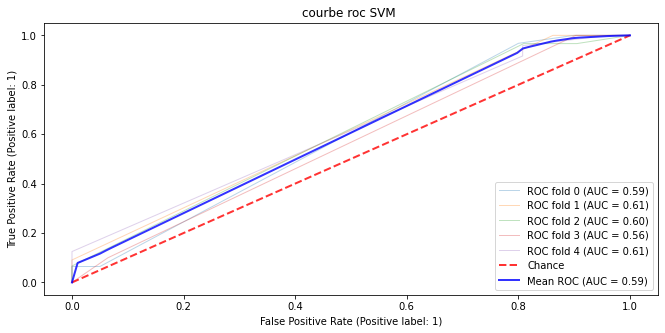

Accuracy: [0.43137255 0.50980392 0.45098039 0.45098039 0.56      ]
moy_accuracy: 0.48
precision: [1.         0.46808511 1.         0.41666667 0.52272727]
moy_precision: 0.68
sensibilité : [0.06451613 1.         0.06666667 1.         0.95833333]
moy_sensibilité: 0.62
spécificité : [1.         0.13793103 1.         0.09677419 0.19230769]
moy_spécificité: 0.49
MCC : [0.16227481 0.25409341 0.16903085 0.20080483 0.23159736]
MCC: 0.20
balanced_accuracy : [0.53225806 0.56896552 0.53333333 0.5483871  0.57532051]
balanced_accuracy: 0.55
roc_auc : [0.58870968 0.60815047 0.60396825 0.56129032 0.60977564]
roc_auc: 0.59
cohen_kappa_scorec : [0.05131495 0.12129566 0.05555556 0.07751938 0.14596273]
cohen_kappa_scorec: 0.09


In [17]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe1, Y)):
         clf.fit( x_rfe1.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe1.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe1, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe1, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe1, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe1, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe1, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe1, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# k_fold=12

In [19]:
rfecv2 = RFECV(XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),cv=StratifiedKFold(12))
rfecv2.fit(X,Y)
# check the support
rfecv2.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [20]:
# name wise features and count
feature_selected2 =  X.columns[rfecv2.get_support()]
feature_selected2

Index(['Amp3_TempJ', 'Min_TempJ', 'Moy_EVI', 'Var_EVI', 'IPT_Moy'], dtype='object')

In [24]:
feature_selected1

Index(['Min_IRM', 'Amp3_TempJ', 'Min_TempJ', 'Max_TempN', 'Moy_EVI', 'Var_EVI',
       'IPT_Moy', 'Prec_Juill', 'Tmax_Avril', 'Vent_Juin'],
      dtype='object')

In [21]:
 x_rfe2=X[feature_selected2]

In [22]:
 x_rfe2

,Amp3_TempJ,Min_TempJ,Moy_EVI,Var_EVI,IPT_Moy
0,7,14721,2906,1,0.375000
1,31,14941,2596,0,-0.281250
2,31,14941,2596,0,-0.281250
3,23,14854,2578,0,0.898438
4,33,14918,2190,35,-3.468750
...,...,...,...,...,...
249,5,14387,5253,47,2.828125
250,1,14350,3460,7,1.265625
251,6,14385,5078,70,2.179688
252,0,0,3571,40,1.406250


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

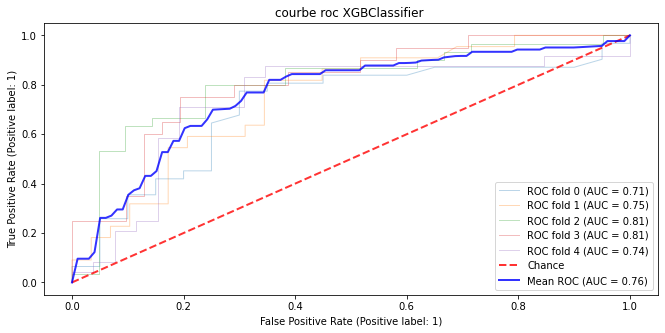

Accuracy: [0.68627451 0.66666667 0.7254902  0.70588235 0.74      ]
moy_accuracy: 0.70
precision: [0.77777778 0.57575758 0.9        0.59259259 0.68965517]
moy_precision: 0.71
sensibilité : [0.67741935 0.86363636 0.6        0.8        0.83333333]
moy_sensibilité: 0.75
spécificité : [0.7        0.51724138 0.9047619  0.64516129 0.65384615]
moy_spécificité: 0.68
MCC : [0.36917519 0.39473234 0.50881628 0.43543741 0.49314274]
MCC: 0.44
balanced_accuracy : [0.68870968 0.69043887 0.75238095 0.72258065 0.74358974]
balanced_accuracy: 0.72
roc_auc : [0.70887097 0.7484326  0.80634921 0.80645161 0.73717949]
roc_auc: 0.76
cohen_kappa_scorec : [0.36448598 0.35920177 0.47111111 0.4191344  0.48330684]
cohen_kappa_scorec: 0.42
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

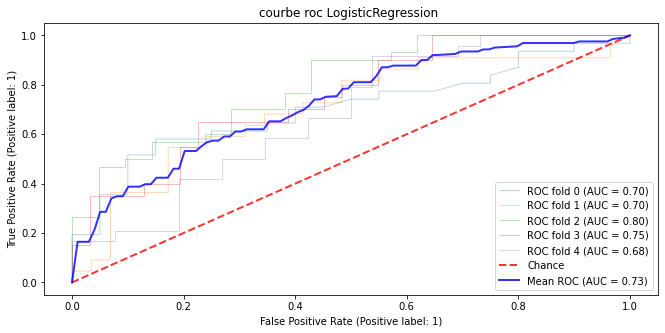

Accuracy: [0.64705882 0.64705882 0.68627451 0.70588235 0.6       ]
moy_accuracy: 0.66
precision: [0.84210526 0.57142857 0.75       0.61904762 0.59090909]
moy_precision: 0.67
sensibilité : [0.51612903 0.72727273 0.7        0.65       0.54166667]
moy_sensibilité: 0.63
spécificité : [0.85       0.5862069  0.66666667 0.74193548 0.65384615]
moy_spécificité: 0.70
MCC : [0.36972449 0.3120159  0.36265926 0.38881244 0.19677829]
MCC: 0.33
balanced_accuracy : [0.68306452 0.65673981 0.68333333 0.69596774 0.59775641]
balanced_accuracy: 0.66
roc_auc : [0.70403226 0.70297806 0.7984127  0.75       0.68108974]
roc_auc: 0.73
cohen_kappa_scorec : [0.33090379 0.30349014 0.36150235 0.38848921 0.19614148]
cohen_kappa_scorec: 0.32
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

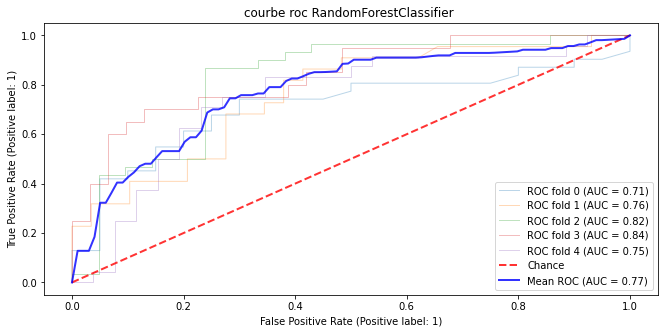

Accuracy: [0.68627451 0.66666667 0.74509804 0.76470588 0.72      ]
moy_accuracy: 0.72
precision: [0.8        0.57575758 0.81481481 0.68181818 0.70833333]
moy_precision: 0.72
sensibilité : [0.64516129 0.86363636 0.73333333 0.75       0.70833333]
moy_sensibilité: 0.74
spécificité : [0.75       0.51724138 0.76190476 0.77419355 0.73076923]
moy_spécificité: 0.71
MCC : [0.38593446 0.39473234 0.48831135 0.51674606 0.43910256]
MCC: 0.44
balanced_accuracy : [0.69758065 0.69043887 0.74761905 0.76209677 0.71955128]
balanced_accuracy: 0.72
roc_auc : [0.71209677 0.75626959 0.81904762 0.83709677 0.74679487]
roc_auc: 0.77
cohen_kappa_scorec : [0.37519142 0.35920177 0.48484848 0.51505547 0.43910256]
cohen_kappa_scorec: 0.43
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

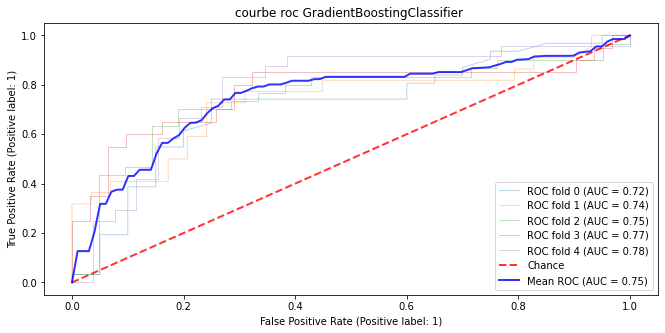

Accuracy: [0.66666667 0.70588235 0.68627451 0.7254902  0.76      ]
moy_accuracy: 0.71
precision: [0.81818182 0.62962963 0.85       0.61538462 0.73076923]
moy_precision: 0.73
sensibilité : [0.58064516 0.77272727 0.56666667 0.8        0.79166667]
moy_sensibilité: 0.70
spécificité : [0.8        0.65517241 0.85714286 0.67741935 0.73076923]
moy_spécificité: 0.74
MCC : [0.37523714 0.42458515 0.42721367 0.46627184 0.5224359 ]
MCC: 0.44
balanced_accuracy : [0.69032258 0.71394984 0.71190476 0.73870968 0.76121795]
balanced_accuracy: 0.72
roc_auc : [0.71693548 0.73589342 0.74761905 0.77258065 0.78365385]
roc_auc: 0.75
cohen_kappa_scorec : [0.35250187 0.41647597 0.39555556 0.4532925  0.52076677]
cohen_kappa_scorec: 0.43
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

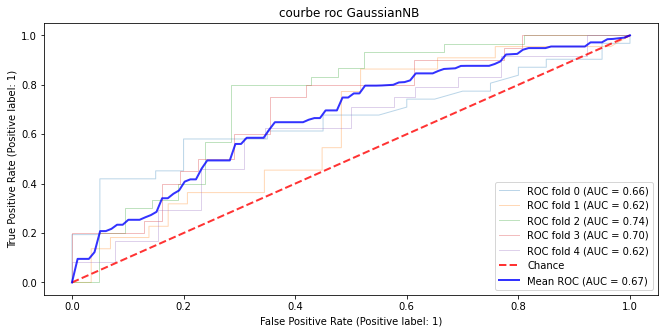

Accuracy: [0.58823529 0.47058824 0.70588235 0.56862745 0.58      ]
moy_accuracy: 0.58
precision: [0.63157895 0.44680851 0.7027027  0.47058824 0.54285714]
moy_precision: 0.56
sensibilité : [0.77419355 0.95454545 0.86666667 0.8        0.79166667]
moy_sensibilité: 0.84
spécificité : [0.3        0.10344828 0.47619048 0.41935484 0.38461538]
moy_spécificité: 0.34
MCC : [0.08311866 0.10683473 0.37811038 0.22718473 0.19218555]
MCC: 0.20
balanced_accuracy : [0.53709677 0.52899687 0.67142857 0.60967742 0.58814103]
balanced_accuracy: 0.59
roc_auc : [0.66209677 0.62304075 0.74285714 0.70483871 0.62179487]
roc_auc: 0.67
cohen_kappa_scorec : [0.07910576 0.05099931 0.36090226 0.19512195 0.17322835]
cohen_kappa_scorec: 0.17
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

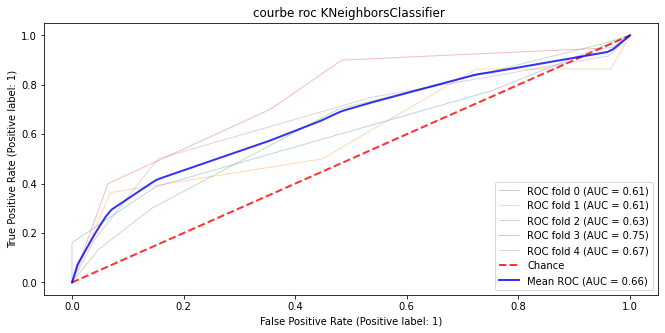

Accuracy: [0.56862745 0.52941176 0.52941176 0.66666667 0.68      ]
moy_accuracy: 0.59
precision: [0.8        0.45833333 0.75       0.56       0.75      ]
moy_precision: 0.66
sensibilité : [0.38709677 0.5        0.3        0.7        0.5       ]
moy_sensibilité: 0.48
spécificité : [0.85       0.55172414 0.85714286 0.64516129 0.84615385]
moy_spécificité: 0.75
MCC : [0.25405317 0.05132348 0.18232322 0.33710194 0.37073365]
MCC: 0.24
balanced_accuracy : [0.61854839 0.52586207 0.57857143 0.67258065 0.67307692]
balanced_accuracy: 0.61
roc_auc : [0.61129032 0.60501567 0.63412698 0.75483871 0.67147436]
roc_auc: 0.66
cohen_kappa_scorec : [0.20762712 0.05116279 0.13924051 0.33050193 0.35064935]
cohen_kappa_scorec: 0.22
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

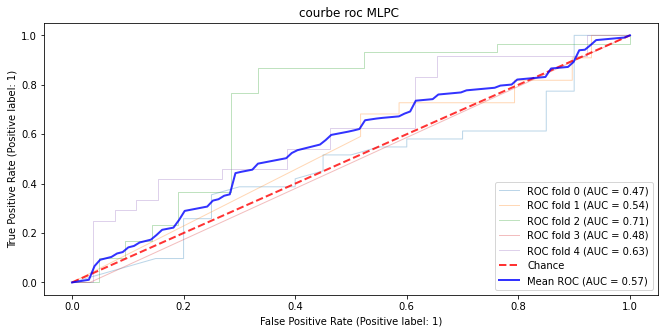

Accuracy: [0.60784314 0.39215686 0.41176471 0.39215686 0.46      ]
moy_accuracy: 0.45
precision: [0.66666667 0.43137255 0.         0.32258065 0.43902439]
moy_precision: 0.37
sensibilité : [1.         0.59090909 0.23333333 0.2        0.25      ]
moy_sensibilité: 0.45
spécificité : [0.8        0.51724138 1.         1.         0.34615385]
moy_spécificité: 0.73
MCC : [0.         0.19905956 0.         0.14492233 0.        ]
MCC: 0.07
balanced_accuracy : [0.5        0.5        0.52619048 0.48387097 0.52724359]
balanced_accuracy: 0.51
roc_auc : [0.5        0.59639498 0.56587302 0.64193548 0.6025641 ]
roc_auc: 0.58
cohen_kappa_scorec : [ 0.         -0.00955631  0.         -0.03879728  0.03697997]
cohen_kappa_scorec: -0.00
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

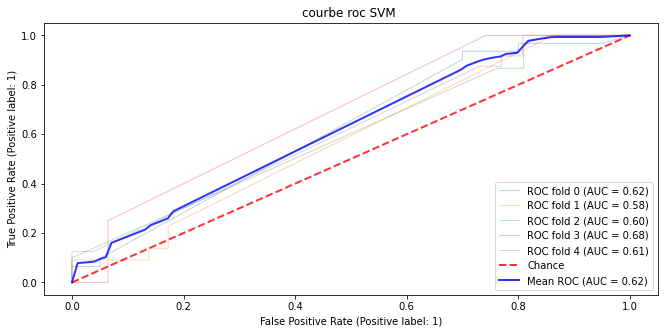

Accuracy: [0.41176471 0.50980392 0.45098039 0.45098039 0.54      ]
moy_accuracy: 0.47
precision: [0.66666667 0.46808511 1.         0.41666667 0.51162791]
moy_precision: 0.61
sensibilité : [0.06451613 1.         0.06666667 1.         0.91666667]
moy_sensibilité: 0.61
spécificité : [0.95       0.13793103 1.         0.09677419 0.19230769]
moy_spécificité: 0.48
MCC : [0.03012072 0.25409341 0.16903085 0.20080483 0.15690377]
MCC: 0.16
balanced_accuracy : [0.50725806 0.56896552 0.53333333 0.5483871  0.55448718]
balanced_accuracy: 0.54
roc_auc : [0.61612903 0.57836991 0.59920635 0.68145161 0.61217949]
roc_auc: 0.62
cohen_kappa_scorec : [0.01162791 0.12129566 0.05555556 0.07751938 0.10575428]
cohen_kappa_scorec: 0.07


In [23]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe2, Y)):
         clf.fit( x_rfe2.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe2.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe2, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe2, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe2, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe2, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe2, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe2, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

# K_Fold=10

In [37]:
rfecv3 = RFECV(XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),cv=StratifiedKFold(10))
rfecv3.fit(X,Y)
# check the support
rfecv3.get_support()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [38]:
# name wise features and count
feature_selected3 =  X.columns[rfecv3.get_support()]
feature_selected3

Index(['Amp3_TempJ', 'Min_TempJ', 'Moy_EVI', 'Var_EVI', 'IPT_Moy',
       'Vent_Juin'],
      dtype='object')

In [39]:
 x_rfe3=X[feature_selected3]

In [40]:
 x_rfe3

,Amp3_TempJ,Min_TempJ,Moy_EVI,Var_EVI,IPT_Moy,Vent_Juin
0,7,14721,2906,1,0.375000,7.1
1,31,14941,2596,0,-0.281250,6.4
2,31,14941,2596,0,-0.281250,6.4
3,23,14854,2578,0,0.898438,6.2
4,33,14918,2190,35,-3.468750,5.7
...,...,...,...,...,...,...
249,5,14387,5253,47,2.828125,3.9
250,1,14350,3460,7,1.265625,3.7
251,6,14385,5078,70,2.179688,4.0
252,0,0,3571,40,1.406250,4.1


XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

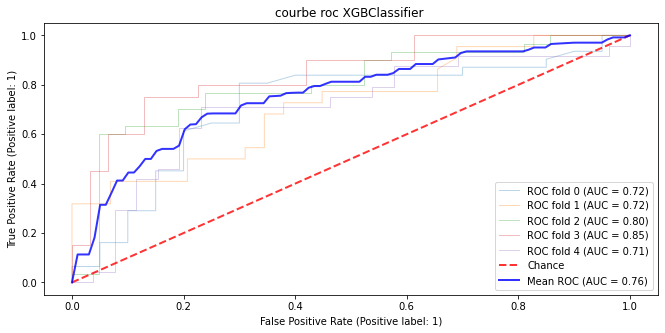

Accuracy: [0.7254902  0.62745098 0.7254902  0.70588235 0.66      ]
moy_accuracy: 0.69
precision: [0.79310345 0.5483871  0.9        0.59259259 0.62962963]
moy_precision: 0.69
sensibilité : [0.74193548 0.77272727 0.6        0.8        0.70833333]
moy_sensibilité: 0.72
spécificité : [0.7        0.51724138 0.9047619  0.64516129 0.61538462]
moy_spécificité: 0.68
MCC : [0.43565668 0.29414776 0.50881628 0.43543741 0.32449893]
MCC: 0.40
balanced_accuracy : [0.72096774 0.64498433 0.75238095 0.72258065 0.66185897]
balanced_accuracy: 0.70
roc_auc : [0.71854839 0.71708464 0.8        0.84677419 0.70673077]
roc_auc: 0.76
cohen_kappa_scorec : [0.43423138 0.27632562 0.47111111 0.4191344  0.32216906]
cohen_kappa_scorec: 0.38
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

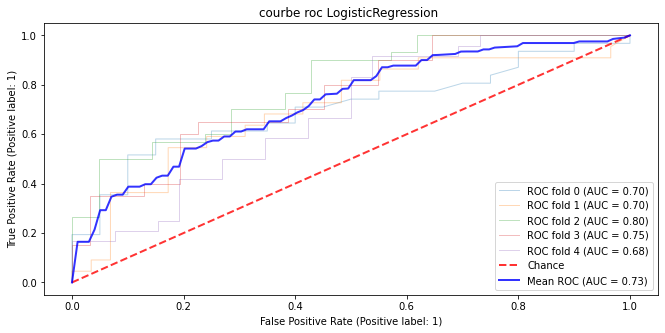

Accuracy: [0.64705882 0.64705882 0.68627451 0.70588235 0.6       ]
moy_accuracy: 0.66
precision: [0.84210526 0.57142857 0.75       0.61904762 0.59090909]
moy_precision: 0.67
sensibilité : [0.51612903 0.72727273 0.7        0.65       0.54166667]
moy_sensibilité: 0.63
spécificité : [0.85       0.5862069  0.66666667 0.74193548 0.65384615]
moy_spécificité: 0.70
MCC : [0.36972449 0.3120159  0.36265926 0.38881244 0.19677829]
MCC: 0.33
balanced_accuracy : [0.68306452 0.65673981 0.68333333 0.69596774 0.59775641]
balanced_accuracy: 0.66
roc_auc : [0.70403226 0.70297806 0.8        0.75322581 0.68429487]
roc_auc: 0.73
cohen_kappa_scorec : [0.33090379 0.30349014 0.36150235 0.38848921 0.19614148]
cohen_kappa_scorec: 0.32
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

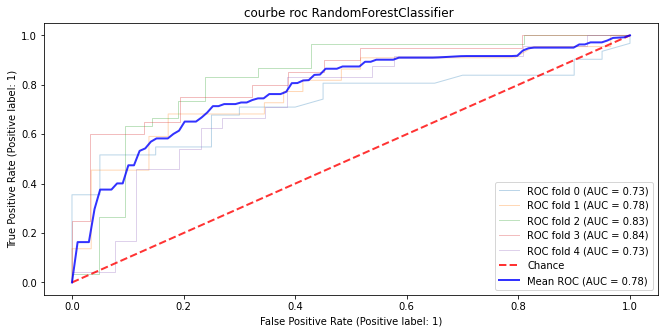

Accuracy: [0.66666667 0.68627451 0.7254902  0.76470588 0.68      ]
moy_accuracy: 0.70
precision: [0.79166667 0.6        0.83333333 0.68181818 0.65384615]
moy_precision: 0.71
sensibilité : [0.61290323 0.81818182 0.66666667 0.75       0.70833333]
moy_sensibilité: 0.71
spécificité : [0.75       0.5862069  0.80952381 0.77419355 0.65384615]
moy_spécificité: 0.71
MCC : [0.35497615 0.40694816 0.46953014 0.51674606 0.36217949]
MCC: 0.42
balanced_accuracy : [0.68145161 0.70219436 0.73809524 0.76209677 0.68108974]
balanced_accuracy: 0.71
roc_auc : [0.72822581 0.77664577 0.83174603 0.83870968 0.72916667]
roc_auc: 0.78
cohen_kappa_scorec : [0.34168565 0.38738739 0.456621   0.51505547 0.36102236]
cohen_kappa_scorec: 0.41
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

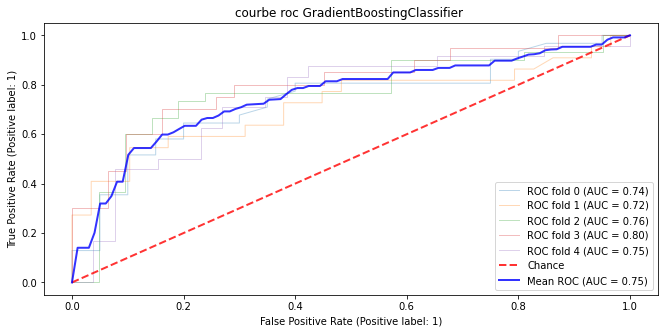

Accuracy: [0.70588235 0.64705882 0.70588235 0.74509804 0.68      ]
moy_accuracy: 0.70
precision: [0.83333333 0.57142857 0.85714286 0.65217391 0.65384615]
moy_precision: 0.71
sensibilité : [0.64516129 0.72727273 0.6        0.75       0.70833333]
moy_sensibilité: 0.69
spécificité : [0.8        0.5862069  0.85714286 0.74193548 0.65384615]
moy_spécificité: 0.73
MCC : [0.43543741 0.3120159  0.45714286 0.48268195 0.36217949]
MCC: 0.41
balanced_accuracy : [0.72258065 0.65673981 0.72857143 0.74596774 0.68108974]
balanced_accuracy: 0.71
roc_auc : [0.73790323 0.72178683 0.76349206 0.8016129  0.74519231]
roc_auc: 0.75
cohen_kappa_scorec : [0.4191344  0.30349014 0.4295302  0.47918303 0.36102236]
cohen_kappa_scorec: 0.40
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

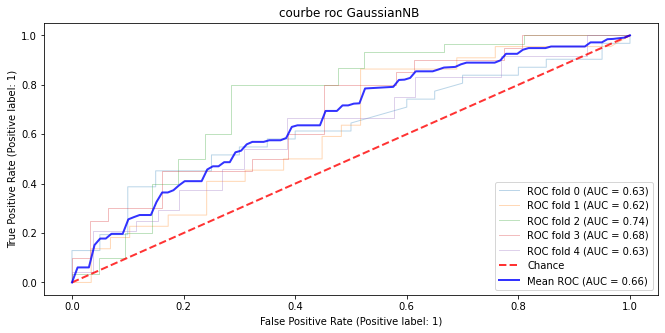

Accuracy: [0.58823529 0.47058824 0.7254902  0.58823529 0.54      ]
moy_accuracy: 0.58
precision: [0.64705882 0.44680851 0.75       0.48484848 0.51612903]
moy_precision: 0.57
sensibilité : [0.70967742 0.95454545 0.8        0.8        0.66666667]
moy_sensibilité: 0.79
spécificité : [0.4        0.10344828 0.61904762 0.4516129  0.42307692]
moy_spécificité: 0.40
MCC : [0.11359237 0.10683473 0.4265617  0.25706061 0.09237152]
MCC: 0.20
balanced_accuracy : [0.55483871 0.52899687 0.70952381 0.62580645 0.54487179]
balanced_accuracy: 0.59
roc_auc : [0.63467742 0.62460815 0.74285714 0.68387097 0.62980769]
roc_auc: 0.66
cohen_kappa_scorec : [0.11267606 0.05099931 0.42512077 0.22559653 0.08874802]
cohen_kappa_scorec: 0.18
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

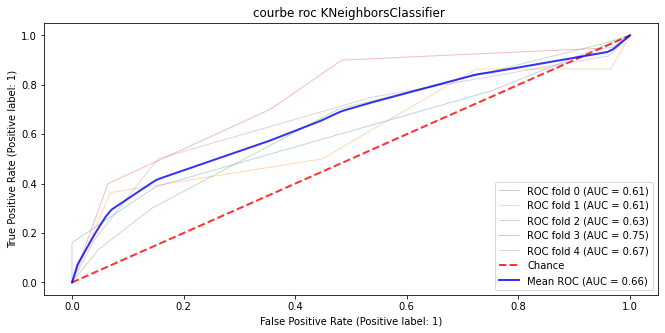

Accuracy: [0.56862745 0.52941176 0.52941176 0.66666667 0.68      ]
moy_accuracy: 0.59
precision: [0.8        0.45833333 0.75       0.56       0.75      ]
moy_precision: 0.66
sensibilité : [0.38709677 0.5        0.3        0.7        0.5       ]
moy_sensibilité: 0.48
spécificité : [0.85       0.55172414 0.85714286 0.64516129 0.84615385]
moy_spécificité: 0.75
MCC : [0.25405317 0.05132348 0.18232322 0.33710194 0.37073365]
MCC: 0.24
balanced_accuracy : [0.61854839 0.52586207 0.57857143 0.67258065 0.67307692]
balanced_accuracy: 0.61
roc_auc : [0.61129032 0.60501567 0.63412698 0.75483871 0.67147436]
roc_auc: 0.66
cohen_kappa_scorec : [0.20762712 0.05116279 0.13924051 0.33050193 0.35064935]
cohen_kappa_scorec: 0.22
MLPC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

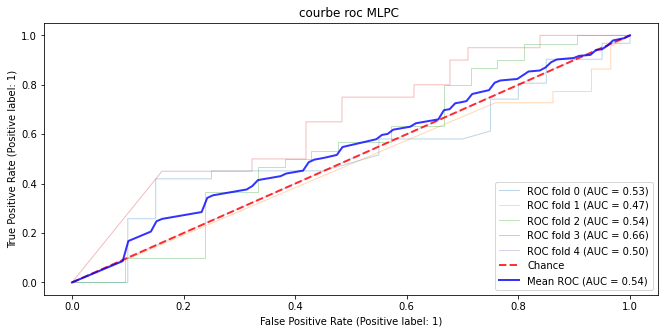

Accuracy: [0.60784314 0.43137255 0.58823529 0.60784314 0.62      ]
moy_accuracy: 0.57
precision: [0.63157895 0.         0.375      0.3        0.75      ]
moy_precision: 0.41
sensibilité : [0.4516129  0.         0.16666667 0.35       0.91666667]
moy_sensibilité: 0.38
spécificité : [1.         0.96551724 0.38095238 1.         0.73076923]
moy_spécificité: 0.82
MCC : [ 0.07777138  0.18663084 -0.16903085 -0.18240584  0.19611614]
MCC: 0.02
balanced_accuracy : [0.57580645 0.50548589 0.5        0.5        0.50320513]
balanced_accuracy: 0.52
roc_auc : [0.5        0.5        0.65873016 0.6733871  0.60817308]
roc_auc: 0.59
cohen_kappa_scorec : [ 0.07977208  0.         -0.04938272  0.20762712  0.        ]
cohen_kappa_scorec: 0.05
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.wa

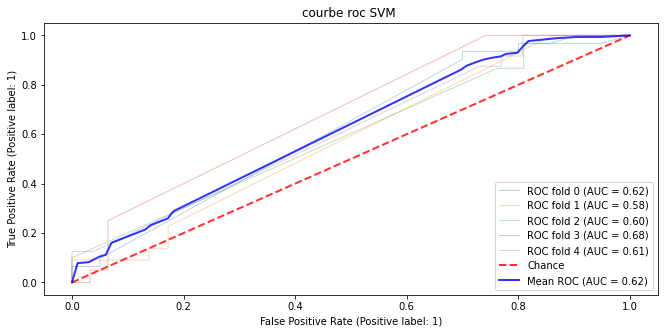

Accuracy: [0.41176471 0.50980392 0.45098039 0.45098039 0.54      ]
moy_accuracy: 0.47
precision: [0.66666667 0.46808511 1.         0.41666667 0.51162791]
moy_precision: 0.61
sensibilité : [0.06451613 1.         0.06666667 1.         0.91666667]
moy_sensibilité: 0.61
spécificité : [0.95       0.13793103 1.         0.09677419 0.19230769]
moy_spécificité: 0.48
MCC : [0.03012072 0.25409341 0.16903085 0.20080483 0.15690377]
MCC: 0.16
balanced_accuracy : [0.50725806 0.56896552 0.53333333 0.5483871  0.55448718]
balanced_accuracy: 0.54
roc_auc : [0.61612903 0.57836991 0.59761905 0.68306452 0.61217949]
roc_auc: 0.62
cohen_kappa_scorec : [0.01162791 0.12129566 0.05555556 0.07751938 0.10575428]
cohen_kappa_scorec: 0.07


In [41]:
classifiers = {
"XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=5,n_estimators=100),
"LogisticRegression": LogisticRegression(max_iter=100 , solver='lbfgs', class_weight='balanced', random_state=11),
"RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state =11),
"GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 ),
"GaussianNB" : GaussianNB(),
"KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4),
"MLPC" :MLPClassifier(hidden_layer_sizes=40,max_iter=600),
"SVM":svm.SVC(kernel='rbf',gamma=0.05,C=12)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split( x_rfe3, Y)):
         clf.fit( x_rfe3.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf,  x_rfe3.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,  x_rfe3, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, x_rfe3, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf,  x_rfe3, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, x_rfe3, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, x_rfe3, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, x_rfe3, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))